# Linear Models in Machine Learning

Linear models are at the core of many old and new machine learning methods and therefore their thorough understanding is important.

## Principal Component Analysis (PCA)

### Demo 1: CIFAR-10 compression using PCA

Let's first load the CIFAR-10 data

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from random import random

def unpickle(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding="latin1")
    return dict

datadict = unpickle('/home/kamarain/Data/cifar-10-batches-py/data_batch_1')
#datadict = unpickle('/home/kamarain/Data/cifar-10-batches-py/test_batch')

X = datadict["data"]
Y = datadict["labels"]

print(X.shape)

labeldict = unpickle('/home/kamarain/Data/cifar-10-batches-py/batches.meta')
label_names = labeldict["label_names"]

X_img = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)

# Show some images
show_inds = [0, 1000, 2000, 4000, 8000]

for i in show_inds:
        plt.figure(1);
        plt.clf()
        plt.imshow(X_img[i])
        plt.title(f"Image {i} label={label_names[Y[i]]} (num {Y[i]})")
        plt.pause(1)

FileNotFoundError: [Errno 2] No such file or directory: '/home/kamarain/Data/cifar-10-batches-py/data_batch_1'

Then, let's perform the PCA transform. The main variable of this is the number of PCA components ("n_components"). 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=307)
pca.fit(X)

plt.plot(pca.singular_values_)
print(pca.explained_variance_ratio_)

Now, we can project all original images to the PCA vectors and thus compress their information. If there is enough components the images should in priciple be indistinguishable from the originals.

In [ ]:
X_pca = pca.transform(X)
print(X_pca.shape)

X_approx = pca.inverse_transform(X_pca)
print(X_approx.shape)

X_approx_img = X_approx.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

for i in show_inds:
        plt.figure(1);
        plt.clf()
        plt.imshow(X_approx_img[i])
        plt.title(f"Image {i} label={label_names[Y[i]]} (num {Y[i]})")
        plt.pause(1)

PCA helps us to find the mean representation of data (e.g. mean face) and the eigen vectors (e.g. eigen faces) so that any data point (e.g. anyone's face) can be generated by adding eigen faces to the mean face with person specific weights.

The PCA weights computed for your face image can be considered as your "face code". Useful for biometric passports, isn't it?

For eigen faces example see: https://www.geeksforgeeks.org/ml-face-recognition-using-eigenfaces-pca-algorithm/

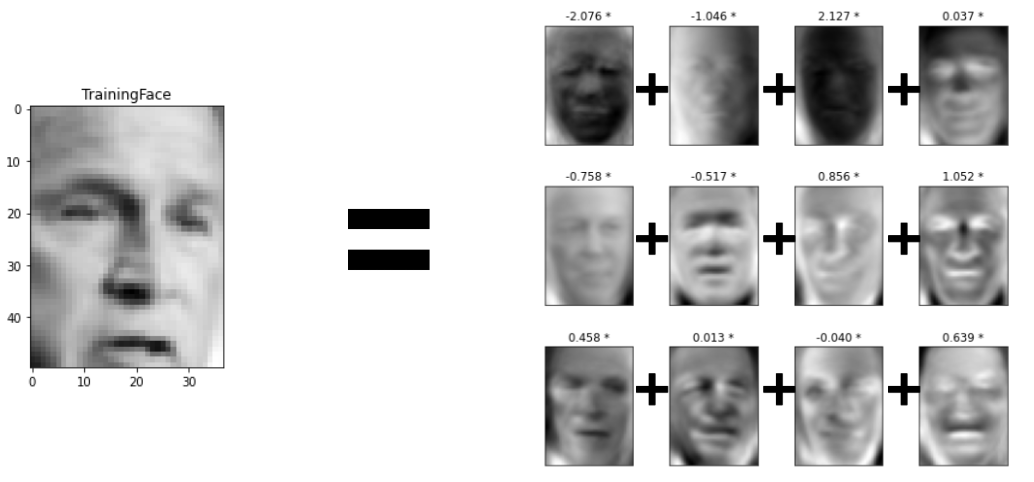

## Linear Discriminant Analysis (LDA)

### Demo 2: Linear projection of two classes
### Demo 3: Foreground-background segmentation using LDA
### PCA vs. LDA for face recognition?

## Logistic Regression

When the two classes are sufficiently well separated, then their log likelihood actually turns to a linear function and can be well approximated. If comparing $p(c_1|x) \sim \mathcal{N}(\mu_1,\sigma_1^2)$ and $p(c_2|x) \sim \mathcal{N}(\mu_2,\sigma_2^2)$ you should play by separating the two probabilities using different values of $\sigma$ and $\mu$. One of them makes the log-likelihood ratio non-linear.

In [ ]:
# Plot log proportion of two gaussians

# Creating a series of data of in range of 1-50.
x = np.linspace(1,50,200)

#Creating a Function.
def normal_dist(x , mean , sd):
    #prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    prob_density = 1/(sd*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

#Calculate mean and Standard deviation.
#mean = np.mean(x)
#sd = np.std(x)

#Apply function to the data.
mu1 = 20
mu2 = 40
sigma1 = 2
sigma2 = 4
pdf1 = normal_dist(x,mu1,sigma1)
pdf2 = normal_dist(x,mu2,sigma2)
log_prop = np.log(normal_dist(x,mu1,sigma1)/normal_dist(x,mu2,sigma2))

#Plotting the Results
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[15,3])
print(np.max(log_prop))
ax1.plot(x,pdf1 , color = 'blue')
ax1.plot(x,pdf2 , color = 'green')
#plt.plot(x,log_prop , color = 'red')
ax1.set_xlabel('Data points')
ax1.set_ylabel('Probability Density')
ax2.plot(x,log_prop , color = 'red')
ax2.set_xlabel('Data points')
ax2.set_ylabel('ln (p1/p2)')

In [ ]:
#Plotting the Results
print(np.max(log_prop))
plt.plot(x[0:50],pdf1[0:50] , color = 'blue')
plt.plot(x[0:50],pdf2[0:50] , color = 'green')
#plt.plot(x,log_prop , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

## Support Vector Machine (SVM)

## References

 * C.M. Bishop (2006): Pattern Recognition and Machine Learning, Chapter 4.
 * A. Kowalczyk (2017): Support Vector Machines Succinctly 